# Day 2 - Data Science Essentils Program

Agenda:
- Wrapping up pandas examples
    - pivot tables
    - advanced data cleaning and calcs
- Visualizations with pandas, matplotlib, seaborn, plotly
- Linear regressions

## Import Packages and Data

In [6]:
import pandas as pd
finData = pd.read_excel("ExData/Data Manipulation Worksheet.xlsx", sheet_name=1)

**Pivot Tables**
- groupby allows summary of categories on the "side" (rows or index)
- pivot_table you can summarize at top as well (columns)

In [9]:
pivot = pd.pivot_table(finData, values='SIZE', index=['INDUSTRY'], columns=['TYPE'],aggfunc=['sum','count'])
# pivot

In [10]:
pivot.to_excel('Output/pivot demo.xlsx')

## Advanced Pandas Functions
- calculations and data cleaning with `.apply()`
- when importing data check:
    - is there a better col to use as the index? 
    - dates should be datetime
    - numbers should be float or int:  `.astype(int)` or `pd.to_numeric()`
    - are there any missing values: `.dropna()` or `.fillna()`

In [12]:
ipoData = pd.read_csv('ExData/iposTable.csv')
ipoData.info()
ipoData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            100 non-null    object 
 1   Symbol             100 non-null    object 
 2   Industry           100 non-null    object 
 3   Offer Date         100 non-null    object 
 4   Shares (millions)  100 non-null    float64
 5   Offer Price        100 non-null    object 
 6   1st Day Close      100 non-null    object 
 7   Current Price      100 non-null    object 
 8   Return             100 non-null    object 
 9   SCOOP Rating       100 non-null    object 
dtypes: float64(1), object(9)
memory usage: 7.9+ KB


,Company,Symbol,Industry,Offer Date,Shares (millions),Offer Price,1st Day Close,Current Price,Return,SCOOP Rating
0,Metals Acquisition Corp,MTAL.U,Blank Check,7/29/2021,25.0,$10.00,$0.00,$0.00,0.00%,S/O
1,"Nuvalent, Inc.",NUVL,Health Care,7/29/2021,9.8,$17.00,$0.00,$0.00,0.00%,S/O
2,Rallybio Corp.,RLYB,Health Care,7/29/2021,6.2,$13.00,$0.00,$0.00,0.00%,S/O
3,Software Acquisition Group Inc. III,SWAGU,Blank Check,7/29/2021,20.0,$10.00,$0.00,$0.00,0.00%,S/O
4,Traeger Inc. (TGPX Holdings I LLC),COOK,Industrials,7/29/2021,23.5,$18.00,$0.00,$0.00,0.00%,S/O


In [23]:
ipoData = pd.read_csv('ExData/iposTable.csv', index_col=['Symbol'], parse_dates=['Offer Date'] )
ipoData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, MTAL.U to LYEL
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            100 non-null    object        
 1   Industry           100 non-null    object        
 2   Offer Date         100 non-null    datetime64[ns]
 3   Shares (millions)  100 non-null    float64       
 4   Offer Price        100 non-null    object        
 5   1st Day Close      100 non-null    object        
 6   Current Price      100 non-null    object        
 7   Return             100 non-null    object        
 8   SCOOP Rating       100 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 7.8+ KB


In [17]:
# ipoData.loc['NUVL']['Offer Price']

'$17.00'

In [20]:
text = "$1,700.50"
float(text.strip("$").replace(",",""))

1700.5

In [24]:
ipoData['Offer Price'] = ipoData['Offer Price'].str.strip("$").str.replace(",","").astype(float)
ipoData['Current Price'] = pd.to_numeric(ipoData['Current Price'].str.strip("$").str.replace(",",""))

In [31]:
# ipoData.info()
# float(["100", "500","600"])
pd.to_numeric("500")
pd.to_numeric(["100", "500","600"]) #array of int
pd.to_numeric(["100.100", "500.2","600.50"]) #floats now

array([100.1, 500.2, 600.5])

In [34]:
ipoData = pd.read_csv('ExData/iposTable.csv', index_col=['Symbol'], parse_dates=['Offer Date'] )
colsToClean = ['Offer Price', 'Current Price', '1st Day Close']
for col in colsToClean:
    ipoData[col] = ipoData[col].str.strip("$").str.replace(",","").astype(float)

ipoData['Return'] = ipoData['Return'].str.strip("%").str.replace(",","").astype(float) / 100

## Cleaning with .apply()
- first create a function that cleans up one piece of text
- then use .apply() to apply that function on the entire column

In [37]:
sp500_data = pd.read_csv("ExData/sp500_Cos_ValMetrics.csv")
sp500_data.head()
    #market cap and EV need to clean up
    #B --> billion, T --> trillion

,Symbol,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA,Beta
0,A,45.29B,46.9B,49.92,32.38,3.33,7.79,9.42,8.06,30.30,1.01
1,AAL,12.84B,47.76B,NaN,-286.00,0.05,1.00,NaN,3.72,-4.44,1.85
2,AAP,13.67B,16.37B,22.45,17.10,1.55,1.27,3.87,1.52,13.20,1.38
3,AAPL,2.43T,2.4T,32.74,27.27,1.53,7.47,35.13,7.38,24.05,1.21
4,ABBV,208.26B,280.2B,40.48,8.44,2.04,4.15,15.18,5.58,11.42,0.80


In [38]:
def cleanFinNumber(x):
    if 'B' in x: #keeps it as billions
        clean = float(x.strip("B").replace(",", ""))
    elif 'T' in x: #converts trillions to billions
        clean = float(x.strip("T").replace(",", "")) * 1000
    else: #in case some numbers don't have B and T, assume it's million --> convert billions
        clean = float(x.replace(',','')) / 1000
    return clean

In [47]:
#testing the function on one piece of text
cleanFinNumber("500.5T")

500500.0

In [48]:
sp500_data['EV (bn)'] = sp500_data['Enterprise Value'].apply(cleanFinNumber)
sp500_data['Mkt Cap (bn)'] = sp500_data['Market Cap (intraday)'].apply(cleanFinNumber)

In [52]:
#sp500_data[['EV (bn)','Enterprise Value']] #.info()

**.apply with more than 1 column**
- can apply a function on multiple columns, but need to specify the axis
    - axis = 1 --> going down, row by row
    - axis = 0 --> going across, col by col

In [53]:
import numpy as np
np.mean(sp500_data['EV (bn)'])

84.11954365079364

In [59]:
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'], index_col=['Date'])
#sp500.apply(np.mean, axis=0) #taking average of each column
sp500[['Close','Open']].apply(np.mean, axis=1) #average of the prices, for each date/row

Date
2013-09-30    5.514397e+08
2013-10-01    5.397831e+08
2013-10-02    5.247681e+08
2013-10-03    5.466097e+08
2013-10-04    4.800464e+08
                  ...     
2018-09-24    5.620374e+08
2018-09-25    5.475824e+08
2018-09-26    5.647724e+08
2018-09-27    5.101441e+08
2018-09-28    5.720524e+08
Length: 1260, dtype: float64

### Coffee break until 10:20am
- open up the visualization examples notebook
- check if you have the following packages installed in DevShell with `pip list`
    - matplotlib - customizing settings and formatting of the charts (font color/size, titles, labels, axis)
    - seaborn - "express" version of matplotlib, can't format as much, but powerful charts
    - plotly - interactive charts

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install plotly

## Visualization Examples

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Simple Graphs with Pandas

In [64]:
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'], index_col=['Date'])
nke = pd.read_csv('StockData/NKE.csv', parse_dates=['Date'])

<Axes: xlabel='Date'>

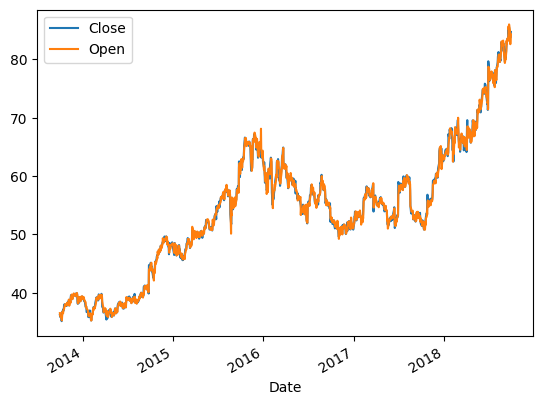

In [72]:
nke.plot(x='Date',y=['Close','Open'])

<Axes: xlabel='Date'>

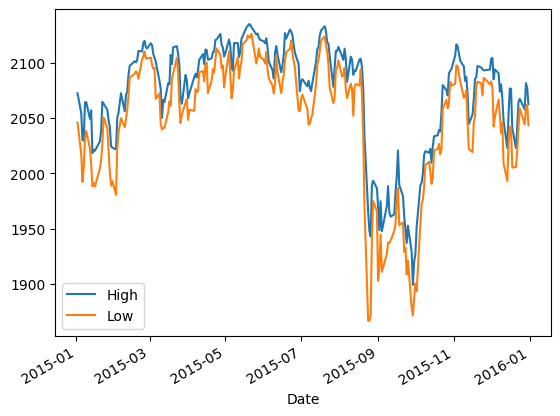

In [70]:
#sp500['Close'].plot() #default is a line graph, x-axis = index col
# nke['Close'].plot() #now plotting row numbers, there is no Date index

sp500.loc['2015'][['High','Low']].plot()

<Axes: xlabel='Open', ylabel='Close'>

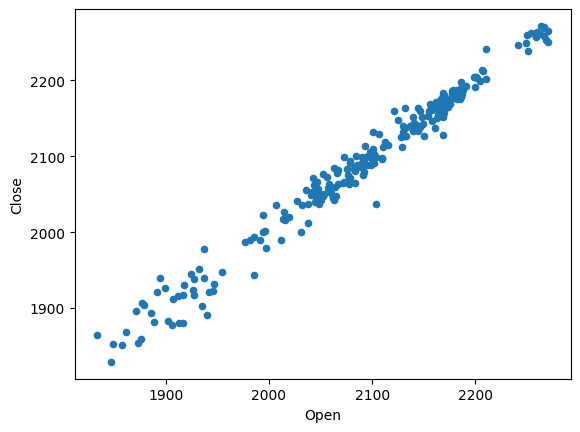

In [74]:
sp500.loc['2016'].plot(x='Open', y='Close', kind='scatter')

In [75]:
sp500['Returns'] = sp500['Close'].pct_change()

<Axes: >

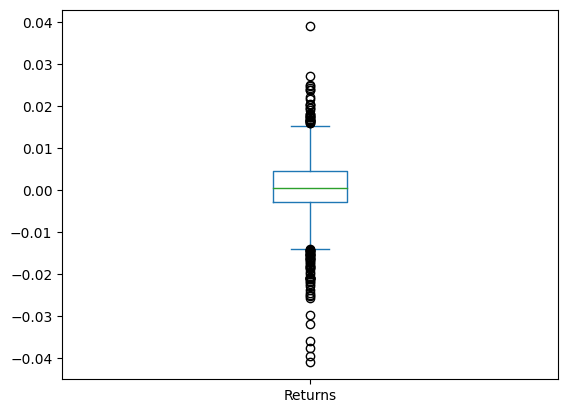

In [77]:
sp500['Returns'].plot(kind='box')

array([[<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Returns'}>]], dtype=object)

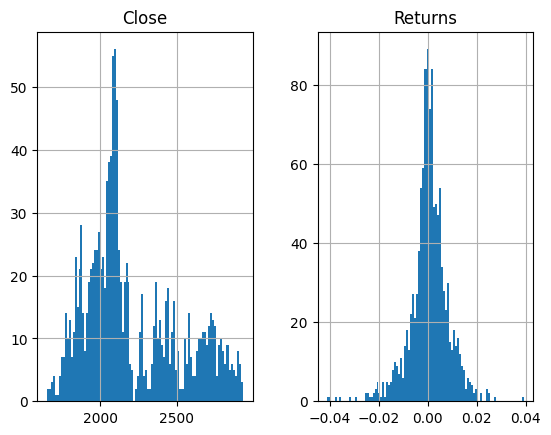

In [80]:
sp500[['Close','Returns']].hist(bins=100)

<Axes: xlabel='Date'>

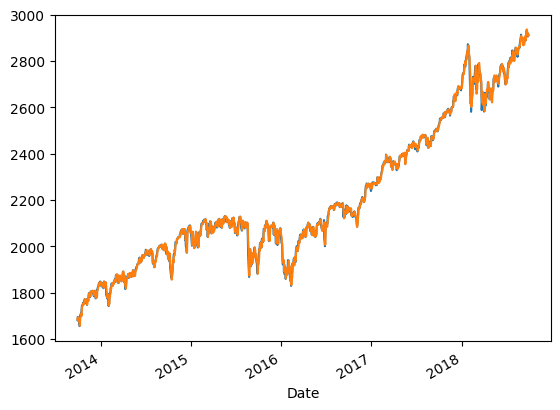

In [81]:
sp500['Close'].plot()
sp500['Open'].plot() #overlaying the series

## Charts with Matplotlib

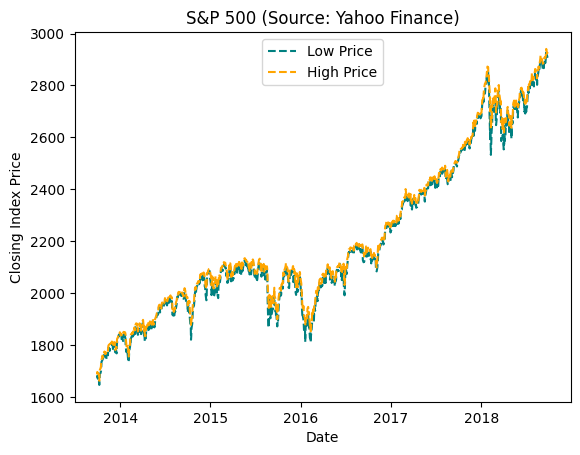

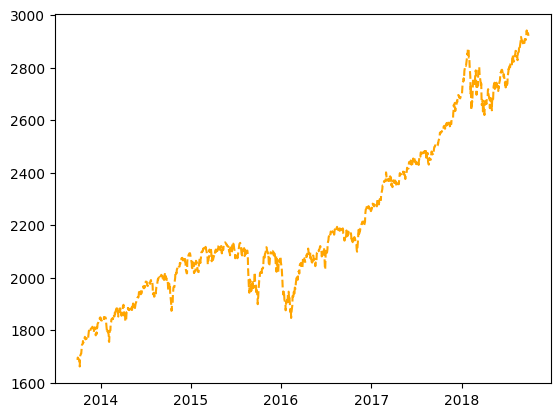

In [104]:
#sp500['Close'].plot()
plt.plot(sp500.index, sp500['Low'], color='teal', linestyle='--')
plt.plot(sp500.index, sp500['High'], color='orange', linestyle='--')
plt.title("S&P 500 (Source: Yahoo Finance)")
plt.ylabel("Closing Index Price")
plt.xlabel("Date")
plt.legend(['Low Price', 'High Price'],loc='upper center')
plt.show() #useful if you will chart more than 1 graphs inside this code box

plt.plot(sp500.index, sp500['High'], color='orange', linestyle='--') #second graph

## Annotations with Matplotlib

In [110]:
#plot the closing prices of S&P and annotate where the max closing price happened
maxPrice = sp500['Close'].max()
maxPriceDate = sp500['Close'].idxmax() #index of the max
#sp500[sp500['Close']==maxPrice]
maxPriceDate, maxPrice

(Timestamp('2018-09-20 00:00:00'), 2930.75)

Text(0.5, 0, 'Date')

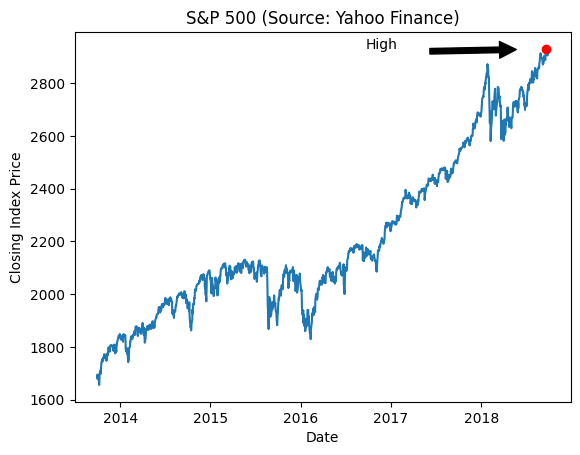

In [124]:
#plot the closing prices of S&P and annotate where the max price happened
plt.plot(sp500.index, sp500['Close']) #entire close price series
plt.plot(maxPriceDate, maxPrice, marker='o', color='red') #just the one data point
#plt.annotate("High",xy=(maxPriceDate, maxPrice - 100))
plt.annotate("High",xy=(maxPriceDate, maxPrice), 
             xytext=(maxPriceDate - pd.DateOffset(365*2), maxPrice),
            arrowprops=dict(facecolor='black',shrink=0.20))
plt.title("S&P 500 (Source: Yahoo Finance)")
plt.ylabel("Closing Index Price")
plt.xlabel("Date")

## Plotting Subplots
`plt.subplot(# rows, # cols, graph #)`

In [125]:
jnj = pd.read_csv("StockData/JNJ.csv", parse_dates=['Date'], index_col=['Date'])
jpm = pd.read_csv("StockData/JPM.csv", parse_dates=['Date'], index_col=['Date'])
aapl = pd.read_csv("StockData/AAPL.csv", parse_dates=['Date'], index_col=['Date'])
nke = pd.read_csv("StockData/NKE.csv", parse_dates=['Date'], index_col=['Date'])

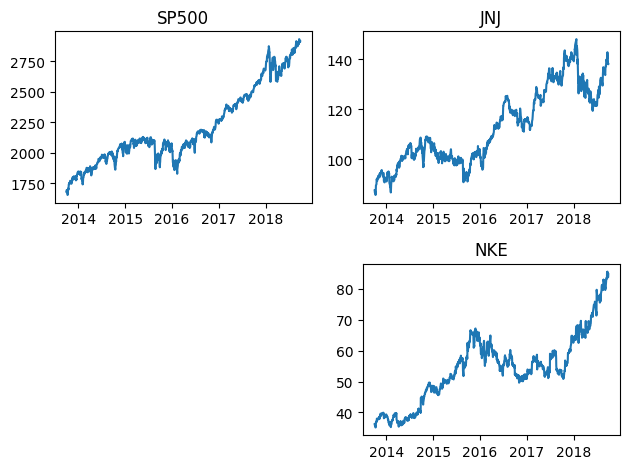

In [132]:
rows = 2
cols = 2

plt.subplot(rows, cols, 1)
plt.plot(sp500.index, sp500['Close'])
plt.title('SP500')

plt.subplot(rows, cols, 2)
plt.plot(jnj.index, jnj['Close'])
plt.title('JNJ')

plt.subplot(rows, cols, 4)
plt.plot(nke.index, nke['Close'])
plt.title('NKE')

plt.tight_layout()
plt.show()

## Working Session - work until lunch (12pm)
- lunch break from 12 to 1pm
- Python 2 Assignment #1, try questions 1, 2
- do the challenge questions directly if you're comfortable with the codes already

**Lunch Break until 1pm**
- will take up challenge questions when we're back

## Takeup Visualization Assignment
- challenge questions from Exercise 1 and 2

In [145]:
aapl.index.year.unique()

Index([2013, 2014, 2015, 2016, 2017, 2018], dtype='int32', name='Date')

In [149]:
# aapl['Year'] = aapl.index.year
# yearly_data = aapl.groupby(['Year'])[['Close']].max()
# yearly_data

In [151]:
firstYear = aapl.index.year.min()
lastYear = aapl.index.year.max()
firstYear, lastYear
for x in range(firstYear, lastYear+1):
    print(x)

2013
2014
2015
2016
2017
2018


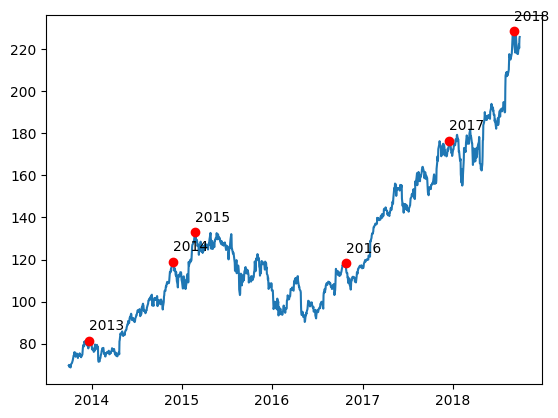

In [147]:
aapl = pd.read_csv("StockData/AAPL.csv", parse_dates=['Date'], index_col=['Date'])
#maxPrice = aapl.loc['2014']['Close'].max()
#maxPriceDate = aapl.loc['2014']['Close'].idxmax() #index of the max

plt.plot(aapl.index, aapl['Close']) #entire close price series

for year in aapl.index.year.unique():
 
    maxPrice = aapl.loc[str(year)]['Close'].max()
    maxPriceDate = aapl.loc[str(year)]['Close'].idxmax() #index of the max
    
    plt.plot(maxPriceDate, maxPrice, marker='o', color='red') #just the one data point
    plt.annotate(str(year),xy=(maxPriceDate, maxPrice+5))

In [138]:
# aapl.loc['2013-10-01':'2013-10-07']
# aapl.iloc[0:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900
2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000
2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300
2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100
2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100


## Question 3 - Subplots Challenge

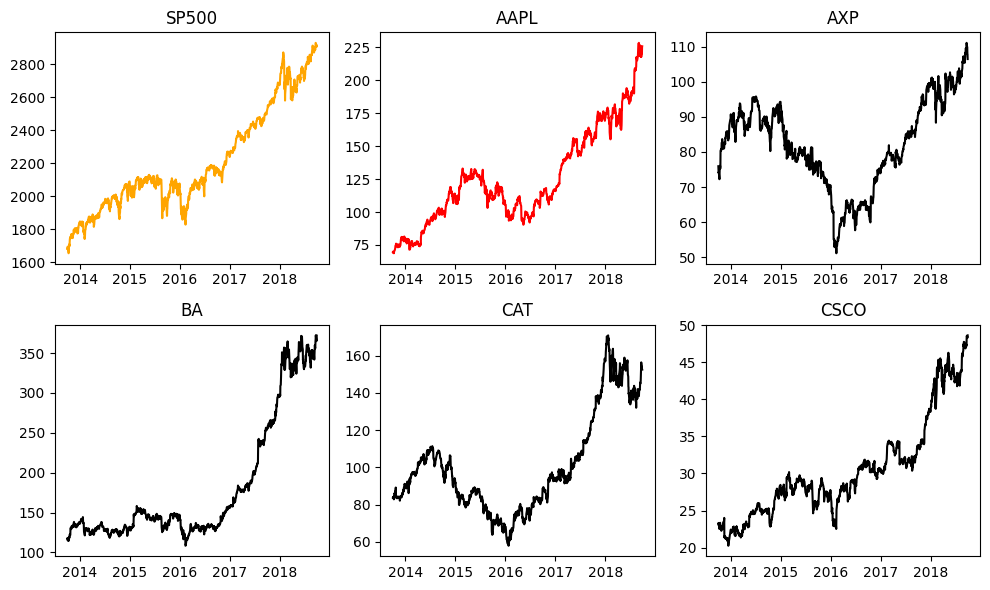

In [174]:
#1 - import all the data
tickers = ['SP500', 'AAPL', 'AXP', 'BA', 'CAT', 'CSCO']
#titles = ['S&P 500', 'Apple Inc', ...]
tables = {} #dictionary container to store all the data
for ticker in tickers: # ticker = 'AAPL'
    df = pd.read_csv("StockData/" + ticker + ".csv", parse_dates=['Date'], index_col=['Date'])
    tables[ticker] = df

rows = 2
cols = 3

#colorMap = {'AAPL':'red','SP500':'blue','AXP':'black','BA':'teal','CSCO':'green'}
colorMap = {'AAPL':'red','SP500':'orange'}

plt.figure(figsize=(10,6))
for idx, ticker in enumerate(tickers):
    #print(idx, ticker)
    plt.subplot(rows, cols, idx + 1)
    df = tables[ticker]
    #plt.plot(df.index, df['Close'])

    if ticker in colorMap.keys():
        color = colorMap[ticker]
        plt.plot(df.index, df['Close'], color=color)
    else:
        plt.plot(df.index, df['Close'], color='black')
    
    plt.title(ticker)

plt.tight_layout()
plt.savefig('Output/assignment question 2 charts.jpg')
plt.show()

In [163]:
#Q looping through multiple variables
tickers = ['AAPL','MSFT','NFLX']
cos = ['Apple','Microsoft','Netflix']
for idx, (ticker, co) in enumerate(zip(tickers, cos)):
    print(idx, ticker,co)

0 AAPL Apple
1 MSFT Microsoft
2 NFLX Netflix


0 SP500
1 AAPL
2 AXP
3 BA
4 CAT
5 CSCO


In [158]:
#tables['SP500'] # dict[key]

## Seaborn Package Demos

<Axes: xlabel='Date', ylabel='Close'>

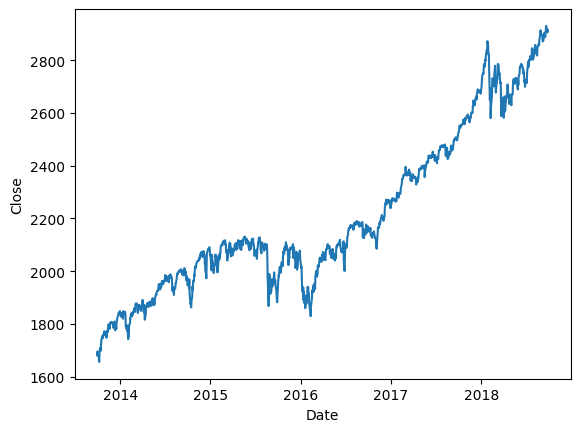

In [183]:
sns.lineplot(sp500,x=sp500.index, y='Close')

<Axes: xlabel='Year', ylabel='Returns'>

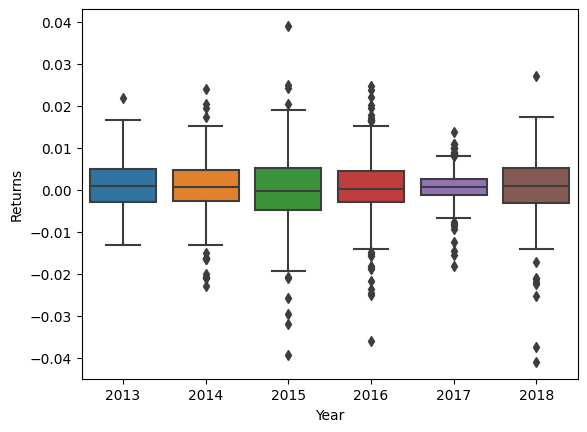

In [186]:
sns.boxplot(sp500,y='Returns', x='Year')

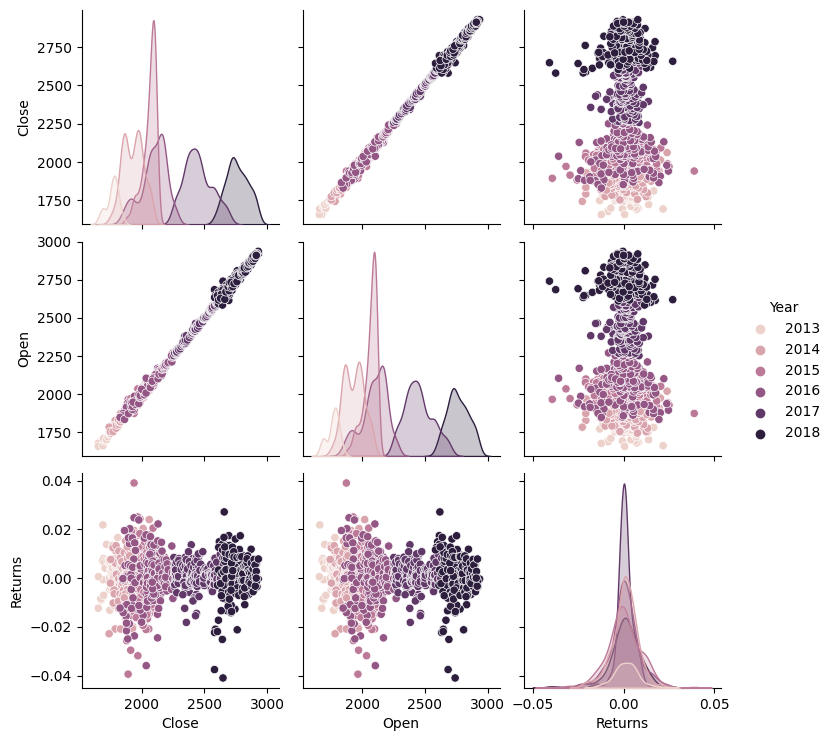

In [182]:
sp500['Year'] = sp500.index.year
#sns.pairplot(sp500) #64 charts too many!!
# sns.pairplot(sp500[['Close','Open','Returns']])
sns.pairplot(sp500[['Close','Open','Returns','Year']], hue='Year')

## Plotly Package

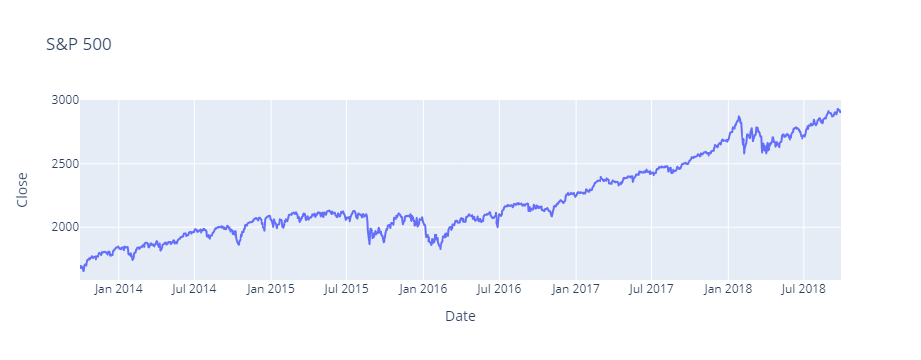

In [190]:
px.line(sp500,x=sp500.index, y='Close', title='S&P 500')

In [192]:
sp500['Ticker'] = 'SP500'
aapl['Ticker'] = 'AAPL'

intc = pd.read_csv("StockData/INTC.csv", parse_dates=['Date'], index_col=['Date'])
intc['Returns'] = intc['Close'].pct_change()
intc['Ticker'] = 'INTC'

ibm = pd.read_csv("StockData/IBM.csv", parse_dates=['Date'], index_col=['Date'])
ibm['Returns'] = ibm['Close'].pct_change()
ibm['Ticker'] = 'IBM'

stockData = pd.concat([intc,aapl,ibm])
#stockData

In [205]:
stockData.to_excel('Output/data for graph.xlsx')

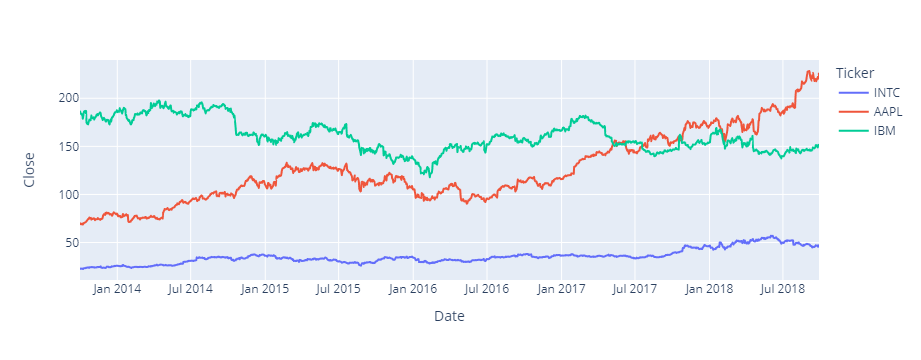

In [199]:
px.line(stockData,x=stockData.index, y='Close', color='Ticker')
            #color --> similar to hue in seaborn, it breaks apart the table into different series
                    #also creates legend

In [204]:
# finData
figBar = px.bar(finData, x='INDUSTRY', y='SIZE', color='TYPE')
# figBar.show()

figBar.write_html(file="Output/plotlyExample.html",auto_open=True)

## Coffee break until 3:00pm


# Linear Regressions

## Simple Example - Exam Scores

In [2]:
import pandas as pd
import statsmodels.api as sm #package for linear regression

In [3]:
df = pd.read_csv("ExData/score.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   27 non-null     float64
 1   Scores  27 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [7]:
#df.describe()

In [11]:
# df['Scores'].hist()
# df['Hours'].hist()

<Axes: xlabel='Hours', ylabel='Scores'>

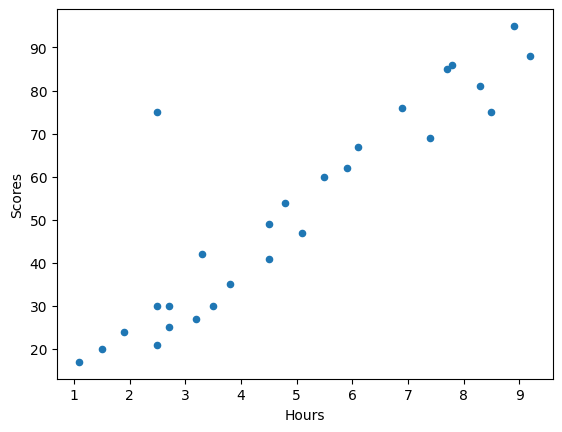

In [12]:
df.plot(x='Hours',y='Scores',kind='scatter')

## Running the linear regression
- model = sm.OLS(y, x's)
- results = model.fit()
- output some of the results info (r^2, summary, coeffcieints, p-val)
- predict new results

In [27]:
import matplotlib.pyplot as plt

In [13]:
model = sm.OLS(df['Scores'], df['Hours'])
            #multiple X's --> just give it multiple cols
            # df[[col1, col2, col3, ...]]
results = model.fit()

In [31]:

results.rsquared # R^2
results.params #coefficients
# results.pvalues
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Scores   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              703.2
Date:                Wed, 04 Oct 2023   Prob (F-statistic):                    2.37e-20
Time:                        15:59:03   Log-Likelihood:                         -102.76
No. Observations:                  27   AIC:                                      207.5
Df Residuals:                      26   BIC:                                      208.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours         10.3456      0.390     26.519      0.000       9.544      11.148
==============================================================================
Omnibus:                       43.258   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.079
Skew:                           3.004   Prob(JB):                     6.46e-41
Kurtosis:                      14.332   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df['Forecast'] = df['Hours'] * 10.345622

In [20]:
df['Predictions'] = results.predict(df['Hours'])

In [23]:
results.predict(5)
results.predict([5,2,6.6, 3, 4])

array([51.72810917, 20.69124367, 68.28110411, 31.0368655 , 41.38248734])

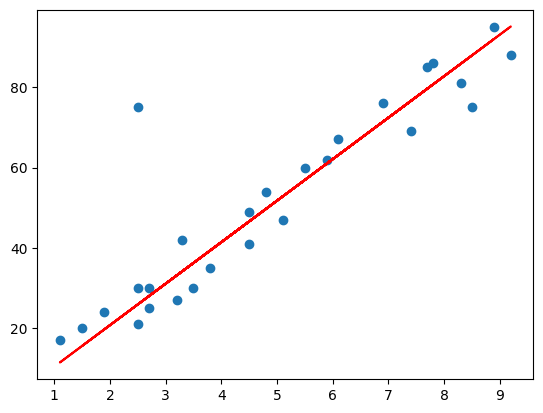

In [30]:
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'],df['Predictions'], color='red')
plt.show()

## Adding a Y-Intercept
- sm.add_constant(X)
- or make a dummy column with 1's and use that as part of your X's

In [32]:
X_intercept = sm.add_constant(df['Hours'])
X_intercept

,const,Hours
0,1.0,2.5
1,1.0,5.1
2,1.0,3.2
3,1.0,8.5
4,1.0,3.5
5,1.0,1.5
6,1.0,9.2
7,1.0,5.5
8,1.0,8.3
9,1.0,2.7


In [36]:
df['Const'] = 1
model = sm.OLS(df['Scores'], df[['Hours','Const']])
# model = sm.OLS(df['Scores'], X_intercept)
results_const = model.fit()

In [35]:
results_const.summary()
    # y= 9.0450 * hours + 7.9390 * const
    # Score = 9.04 * hours + 7.939

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     113.9
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           8.49e-11
Time:                        16:01:54   Log-Likelihood:                -101.26
No. Observations:                  27   AIC:                             206.5
Df Residuals:                      25   BIC:                             209.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hours          9.0450      0.848     10.672      0.000       7.299      10.790
Const          7.9390      4.635      1.713      0.099      -1.607      17.485
==============================================================================
Omnibus:                       40.541   Durbin-Watson:                   1.574
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.698
Skew:                           2.846   Prob(JB):                     1.89e-33
Kurtosis:                      13.078   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
df['Predict with const'] = results_const.predict(df[['Hours','Const']])
df.head()

,Hours,Scores,Forecast,Predictions,Const,Predict with const
0,2.5,21,25.864055,25.864055,1,30.551360
1,5.1,47,52.762672,52.762671,1,54.068251
2,3.2,27,33.105990,33.105990,1,36.882831
3,8.5,75,87.937787,87.937786,1,84.821108
4,3.5,30,36.209677,36.209676,1,39.596318


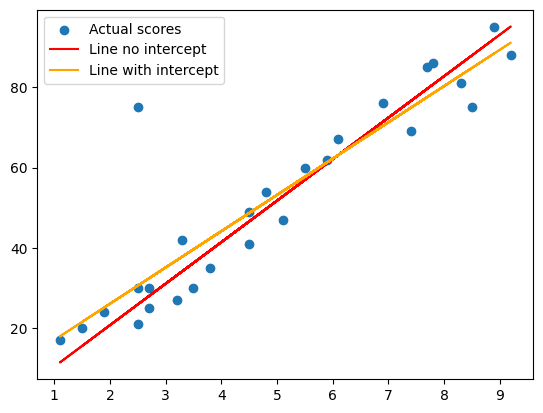

In [42]:
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'],df['Predictions'], color='red')
plt.plot(df['Hours'],df['Predict with const'], color='orange')
plt.legend(['Actual scores','Line no intercept', 'Line with intercept'])
plt.show()

## S&P 500 vs AAPL Example
- CAPM = capital asset pricing model
    - return equity = rf + beta * MRP
    - rf = risk free rate = 5 or 10 yr gov't bonds
    - MRP = market risk premium = excess returns of stock market over rf
        - "market" - in practice pick an index, e.g. S&P 500 or Russell 2000
    - rStock - rf = beta * MRP = beta * (rMarket - rf)
    - assume rf = 0
        -  rStock = beta * rMarket
        -  rAAPL = beta * rS&P500

In [45]:
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'],index_col=['Date'])
aapl = pd.read_csv('StockData/AAPL.csv', parse_dates=['Date'],index_col=['Date'])

In [49]:
sp500['Returns'] = sp500['Close'].pct_change()
aapl['Returns'] = aapl['Close'].pct_change()

In [52]:
mergedData = sp500.merge(aapl, on=['Date'], how='inner')
mergedData.dropna(inplace=True)
# mergedData

In [53]:
model = sm.OLS( mergedData['Returns_y'], mergedData['Returns_x'])
model_const = sm.OLS( mergedData['Returns_y'], sm.add_constant(mergedData['Returns_x']))

results = model.fit()
results_const = model_const.fit()

In [54]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Returns_y   R-squared (uncentered):                   0.321
Model:                            OLS   Adj. R-squared (uncentered):              0.321
Method:                 Least Squares   F-statistic:                              594.5
Date:                Wed, 04 Oct 2023   Prob (F-statistic):                   7.67e-108
Time:                        16:27:14   Log-Likelihood:                          3810.0
No. Observations:                1258   AIC:                                     -7618.
Df Residuals:                    1257   BIC:                                     -7613.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Returns_x      1.0363      0.043     24.383      0.000       0.953       1.120
==============================================================================
Omnibus:                      220.041   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3571.548
Skew:                           0.262   Prob(JB):                         0.00
Kurtosis:                      11.238   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
results_const.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Returns_y   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     588.5
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          6.32e-107
Time:                        16:28:45   Log-Likelihood:                 3811.5
No. Observations:                1258   AIC:                            -7619.
Df Residuals:                    1256   BIC:                            -7609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.692      0.091   -8.94e-05       0.001
Returns_x      1.0320      0.043     24.258      0.000       0.949       1.116
==============================================================================
Omnibus:                      219.898   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3567.947
Skew:                           0.261   Prob(JB):                         0.00
Kurtosis:                      11.234   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
mergedData['Predictions'] = results.predict(mergedData['Returns_x'])
mergedData['Predictions 2'] = results_const.predict(sm.add_constant(mergedData['Returns_x']))

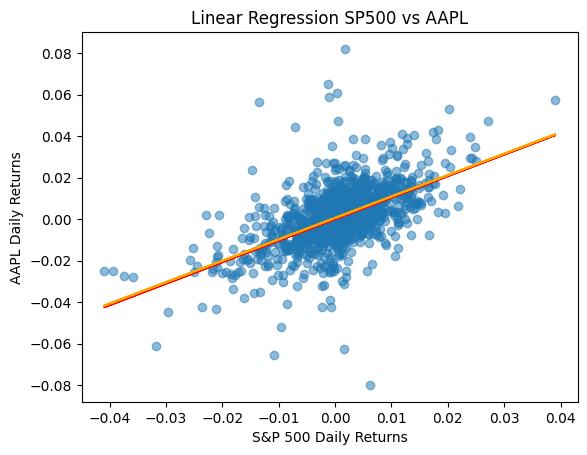

In [57]:
plt.plot(mergedData['Returns_x'],mergedData['Predictions'],'red')
plt.plot(mergedData['Returns_x'],mergedData['Predictions 2'],'orange')
plt.scatter(mergedData['Returns_x'],mergedData['Returns_y'],alpha=0.5)
plt.title("Linear Regression SP500 vs AAPL")
plt.xlabel("S&P 500 Daily Returns")
plt.ylabel("AAPL Daily Returns")
plt.show()

## Extra Practice
- Try Exercise 1 from Python 2 Assignment 2 (Fama French 3 Factor Model)
- Takeup tomorrow morning